In [ ]:

import webbrowser

webbrowser.open('https://dr7.lamost.org/v2.0/search')

webbrowser.open('https://dr7.lamost.org/v2.0/medcas/search')

webbrowser.open('https://dr7.lamost.org/spectrum/')

webbrowser.open('https://dr7.lamost.org/catalogue')



In [ ]:
webbrowser.open('https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=V/156')

webbrowser.open('https://annayqho.github.io/TheCannon/lamost_tutorial.html')

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

import astropy.coordinates as coord
import astropy.units as u

import pyvo as vo

import webbrowser

import starcolorindexSpT 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
import astroquery

print("pandas" + str(pd.__version__))
print("numpy"  + str(np.__version__))
print("scipy"  + str(sp.__version__))

print("matplotlib" + str(matplotlib.__version__))

print("astroquery" + str(astroquery.__version__))


print("\n")
!python --version

print("\n")
!jupyter --version

pandas1.1.5
numpy1.24.2
scipy1.9.3
matplotlib3.2.2
astroquery0.4.7.dev8479


Python 3.8.5


Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.19.2
ipywidgets       : 8.0.4
jupyter_client   : 8.1.0
jupyter_core     : 5.3.0
jupyter_server   : 2.5.0
jupyterlab       : not installed
nbclient         : 0.5.13
nbconvert        : 7.3.1
nbformat         : 5.7.0
notebook         : 6.5.3
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [ ]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
make_canvas_flag = "Y"

hydrogen_lines_flag = "N"

In [4]:
def make_labels(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

In [5]:
def make_RVS_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin ], rotation=-90, color='red')
    plt.annotate('Pa14 8600', xy=[8600, yRangeMin - 0.3 ], rotation=-90, color='red')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin ],  rotation=-90, color='red')

In [6]:
# Plotter ==============================================
def make_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200])
    
    xLabels = (3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('CN 3839', xy=[3839,   yRangeMin + 0.6],  rotation=-90)
    plt.annotate('H-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('He I 4471.7', xy=[4472, yRangeMin + .20],  rotation=-90, color='orange')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('Mg I 5175', xy=[5175, yRangeMin + .20],  rotation=-90)
    plt.annotate('Fe I 5270', xy=[5270, yRangeMin +  .20],  rotation=-90)
    plt.annotate('He II 5411', xy=[5411, yRangeMin +  .20],  rotation=-90, color='orange')
    plt.annotate('N II 5755', xy=[5755, yRangeMin +  .20],  rotation=-90)
    plt.annotate('D1 Na I 5895', xy=[5895, yRangeMin +  .20],  rotation=-90, color='blue')
    plt.annotate('OI 6302', xy=[6302, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('OI 6365.5', xy=[6365, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('CN 6890', xy=[6890, yRangeMin +  .20],  rotation=-90)
    plt.annotate('Ar III 7135', xy=[7135, yRangeMin +  .20],  rotation=-90)
    plt.annotate('O I 7775', xy=[7775, yRangeMin +  .20], rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin +  .35],  rotation=-90, color='blue')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin +  .30], rotation=-90, color='blue')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin +  .30],  rotation=-90, color='blue')





def Hydrogen_lines(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000])
    
    xLabels = (3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('H12 3750', xy=[3750, yRangeMin +  .50],  rotation=-90, color='red')
    plt.annotate('H11 3771', xy=[3771, yRangeMin -  .35],  rotation=-90, color='red')
    plt.annotate('H10 3798', xy=[3798, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H9 3835', xy=[3835, yRangeMin -  .10],  rotation=-90, color='red')

    plt.annotate('H8-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')

In [7]:
def make_RVS_canvas1(xlabel = '', ylabel = '', fontsize = 12):     ### 8460 - 8580
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8470', xy=[8470, yRangeMin ],  rotation=-90, color='green')
    plt.annotate('Mg I 8476', xy=[8476, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8483', xy=[8483, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8502', xy=[8502, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ce II 8514', xy=[8514, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8516', xy=[8516, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8520.6', xy=[8520.6, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Zr II 8527', xy=[8527, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8529', xy=[8529, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8538', xy=[8538, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8546', xy=[8546, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Cr I 8551', xy=[8551, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8559', xy=[8559, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Ti I 8572', xy=[8572, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8574', xy=[8574, yRangeMin - 0.3],  rotation=-90, color='green')

In [8]:
def make_RVS_canvas2(xlabel = '', ylabel = '', fontsize = 12):    ### 8580 - 8700
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8584', xy=[8584, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe II 8588', xy=[8588, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Nd II 8594', xy=[8594, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8624', xy=[8624, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('N I 8631',  xy=[8631, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ca I 8636',  xy=[8636, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ni I 8639',  xy=[8639, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Cr I 8645', xy=[8645, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8662', xy=[8662, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8666', xy=[8666, yRangeMin],  rotation=-90, color='red')
    plt.annotate('S I 8672',  xy=[8672, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8677', xy=[8677, yRangeMin],  rotation=-90, color='green')
    plt.annotate('N I 8685',  xy=[8685, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Si I 8688', xy=[8688, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8691', xy=[8691, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8694', xy=[8694, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('S I 8697',  xy=[8697, yRangeMin  - 0.3 ],  rotation=-90, color='red')

In [9]:
def PlotTarget4B(target, i, targetstring, freqmin, freqmax):
    import matplotlib.pyplot as plt

    import astropy.units as u
    

    plt.rcParams.update({'figure.max_open_warning': 0})
    


    lc0 = lk.search_lightcurve(target)[i].download();

    lc = lc0.remove_nans().normalize().remove_outliers()


    
    #lc = lc0.flatten()
    #lc = lc0.remove_outliers()
    #lc = lc0.remove_outliers(sigma=3)





    if plot_lightcurve  == "Y":
        #plt.figure(figsize=(13, 10))
        lc.plot()
        #lc.plot(label='Lightcurve Plot2')
        sText = "\nLightcurve Plot"
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
       
    
    #period = np.linspace(1, 20, 10000)
    period = np.linspace(freqmin, freqmax, 10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls = lc.normalize().to_periodogram(method='bls', period=period, frequency_factor=500);
    
    period_array = bls.period
    period_rounded = np.round(period_array, 1)
    power_array = bls.power

    # Save the highest peak as the planet candidate
    #index = np.argmax(power_array.power)
    #bls_period = period_array.period[index]


    df_dict = {
        'Period': period_rounded,
        'Power': power_array
        }
    df = pd.DataFrame(df_dict)
    df = df.sort_values(by=['Power'], ascending=False)
    df = df.drop_duplicates(subset=['Period'], keep='first')
    #print(df[0:10])


    planet_period = bls.period_at_max_power
    planet_t0 = bls.transit_time_at_max_power
    planet_dur = bls.duration_at_max_power

    if plot_period      == "Y":
        #plt.figure(figsize=(13, 10))
        #print("Period Array: " + str(period_array))
        bls.plot()
        #plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:  " + str(planet_period));
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:   + {0:.4f} ".format(planet_period) + "\nlc0.remove_nans().normalize().remove_outliers()");
        #plt.axvline(bls_period, color="C1", lw=5, alpha=0.8)
        # + "\nPeriod array: " + str(period_array)  + "\nPower array: " + str(power_array)
        #print(df['Period'][0:10])


    if plot_phase_fold  == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText = "\nPhase-fold the light curve to confirm period and transit time (epoch) \ncorrespond to a transit signal."
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
        plt.show();

    if plot_4phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power
        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    
    if plot_periodogram == "Y":
        pg = lc.to_periodogram(oversample_factor=1)
        pg.plot()
        sText = "\nPlot the periodogram in the same way that we plot the original light curve."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)   + sText)
        plt.show()

        pg.plot(view='period', scale='log')
        sText = "\nLet's plot it in period space, so that we can see what period the oscillation is occurring at."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=pg.period_at_max_power).scatter()
        sText = "\nLet's use the period_at_max_power to fold the light curve"
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter()
        sText = "\nIf the eclipses do not line up, try plotting it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power  
        sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter and by constraining the range of the period value:"
        #sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter."
        lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter()
        #lc.fold(period=pg.period_at_max_power).scatter()
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)  + sText)
        plt.show()

    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.close()

In [10]:
pd.set_option('display.max_columns', None)

In [69]:
#df_lamost_stars = pd.read_csv('LAMOST LRS General Catalog.csv', delimiter='|')    # 10431197 stars

df_lamost_LRS_stars = pd.read_csv('dr7_v2.0_LRS_catalogue.csv', delimiter='|')     # 10431197 stars

df_lamost_MRS_stars = pd.read_csv('dr7_v2.0_MRS_catalogue.csv', delimiter='|')     # 14096967 stars - No subclass field

#df_lamost_stars = pd.read_csv('dr7_v2.0_LRS_mstellar.csv', delimiter='|')         # 708797 stars

#df_lamost_stars = pd.read_csv('dr7_v2.0_LRS_cv.csv', delimiter='|')               # 424 stars

#df_lamost_stars = pd.read_csv('dr7_v2.0_LRS_wd.csv', delimiter='|')               # 14531 stars


#df_lamost_stars.shape[0]

In [70]:
df_lamost_LRS_stars.head()

,obsid,designation,obsdate,lmjd,mjd,planid,spid,fiberid,ra_obs,dec_obs,...,fibertype,tfrom,tcomment,offsets,offsets_v,ra,dec,fibermask,gaia_source_id,gaia_g_mean_mag
0,101001,J220848.54-020324.3,2011-10-24,55859,55858,F5902,1,1,332.202274,-2.056767,...,Obj,-,.,0,0.0,332.202274,-2.056767,2,2.676862e+18,16.468395
1,101002,J220953.17-020506.0,2011-10-24,55859,55858,F5902,1,2,332.471576,-2.085015,...,Obj,-,.,0,0.0,332.471576,-2.085015,0,2.676109e+18,16.623343
2,101005,J221008.50-020659.1,2011-10-24,55859,55858,F5902,1,5,332.535456,-2.116436,...,Obj,-,.,0,0.0,332.535456,-2.116436,0,2.676109e+18,17.034334
3,101007,J221003.01-015029.0,2011-10-24,55859,55858,F5902,1,7,332.512558,-1.841408,...,Obj,-,.,0,0.0,332.512558,-1.841408,8,2.676873e+18,18.120117
4,101008,J220928.49-015720.7,2011-10-24,55859,55858,F5902,1,8,332.368745,-1.955771,...,Obj,-,.,0,0.0,332.368745,-1.955771,0,2.676865e+18,16.039270


In [71]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))


10431197 rows
9781.1 MB


In [72]:
df_lamost_LRS_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str) != '-9999']

In [73]:
df_lamost_LRS_stars = df_lamost_LRS_stars[['obsid','designation','objtype','class', 'subclass','gaia_source_id']]

In [74]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

10431197 rows
2941.7 MB


In [75]:
df_lamost_MRS_stars.head()

,mobsid,obsid,designation,obsdate,lmjd,mjd,planid,spid,fiberid,lmjm,...,rv_lasp1_err,coadd,fibermask,bad_b,bad_r,gaia_source_id,gaia_g_mean_mag,moon_angle,lunardate,moon_flg
0,58891524483556038B,588915244,J010217.11+061808.0,2017-09-28,58025,58024,HIP507401,15,244,83556038.0,...,-9999.00,0,0.0,0,0,2577199768825094016,14.951456,95.2,9,0
1,58890221283556038B,588902212,J005946.46+033816.3,2017-09-28,58025,58024,HIP507401,2,212,83556038.0,...,1.15,0,0.0,0,0,2551489746698714368,11.647265,95.2,9,0
2,58891519683556038B,588915196,J010354.98+062221.3,2017-09-28,58025,58024,HIP507401,15,196,83556038.0,...,-9999.00,0,0.0,0,0,2576471926487172224,15.034384,95.2,9,0
3,58890818283556038B,588908182,J010636.29+043330.6,2017-09-28,58025,58024,HIP507401,8,182,83556038.0,...,-9999.00,0,0.0,0,0,2540020607765617664,14.136907,95.2,9,0
4,58890914083556038B,588909140,J010955.98+055445.7,2017-09-28,58025,58024,HIP507401,9,140,83556038.0,...,-9999.00,0,0.0,0,0,2576281092500224896,12.546629,95.2,9,0


In [76]:
print('{:d} rows'.format(len(df_lamost_MRS_stars)))
print('{:.1f} MB'.format(df_lamost_MRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

14096967 rows
15472.0 MB


In [77]:
df_lamost_MRS_stars = df_lamost_MRS_stars[df_lamost_MRS_stars['gaia_source_id'].astype(str) != '-9999']

In [78]:
df_lamost_MRS_stars = df_lamost_MRS_stars[['mobsid','obsid','designation','objtype','gaia_source_id']]

In [79]:
print('{:d} rows'.format(len(df_lamost_MRS_stars)))
print('{:.1f} MB'.format(df_lamost_MRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

13709506 rows
3213.5 MB


In [80]:
df_lamost_LRS_stars['gaia_source_id'] = df_lamost_LRS_stars['gaia_source_id'].astype('Int64')

df_lamost_MRS_stars['gaia_source_id'] = df_lamost_MRS_stars['gaia_source_id'].astype('Int64')

In [81]:
unique_class = np.unique(df_lamost_LRS_stars['class'].astype(str))

In [82]:
unique_class

array(['GALAXY', 'QSO', 'STAR', 'Unknown'], dtype=object)

In [83]:
for vartype in unique_class:
    v = df_lamost_LRS_stars[df_lamost_LRS_stars['class'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

GALAXY  count: 198272
QSO  count: 66612
STAR  count: 9846793
Unknown  count: 319520


In [84]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

10431197 rows
2952.2 MB


In [85]:
df_lamost_LRS_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['class'] == 'STAR']

In [86]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

9846793 rows
2785.0 MB


In [87]:
unique_subclass = np.unique(df_lamost_LRS_stars['subclass'].astype(str))

In [88]:
unique_subclass

array(['A0', 'A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'B', 'B6',
       'B9', 'CV', 'Carbon', 'CarbonWD', 'DoubleStar', 'EM', 'F0', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G0', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'K0', 'K1', 'K2', 'K3', 'K4',
       'K5', 'K7', 'L0', 'O', 'OB', 'WD', 'dK7', 'dM0', 'dM1', 'dM2',
       'dM3', 'dM4', 'dM5', 'dM6', 'dM7', 'dM8', 'dM9', 'gM0', 'gM1',
       'gM2', 'gM3', 'gM4', 'gM5', 'gM6', 'gM7', 'gM8', 'gM9', 'sdM0',
       'sdM1', 'sdM2', 'sdM3', 'sdM4', 'sdM5', 'sdM6', 'sdM7', 'sdM8'],
      dtype=object)

In [89]:
for vartype in unique_subclass:
    v = df_lamost_LRS_stars[df_lamost_LRS_stars['subclass'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

A0  count: 15472
A1  count: 131191
A2  count: 125399
A3  count: 42343
A5  count: 82322
A6  count: 60145
A7  count: 112751
A8  count: 6801
A9  count: 21338
B  count: 47
B6  count: 10750
B9  count: 7340
CV  count: 424
Carbon  count: 4644
CarbonWD  count: 337
DoubleStar  count: 5430
EM  count: 311
F0  count: 509981
F2  count: 229176
F3  count: 67759
F4  count: 52482
F5  count: 533421
F6  count: 213171
F7  count: 257098
F8  count: 67666
F9  count: 495355
G0  count: 288873
G1  count: 104634
G2  count: 545291
G3  count: 700260
G4  count: 185371
G5  count: 994085
G6  count: 176981
G7  count: 574715
G8  count: 412806
G9  count: 188126
K0  count: 118587
K1  count: 287486
K2  count: 25893
K3  count: 373549
K4  count: 153669
K5  count: 556471
K7  count: 383355
L0  count: 1
O  count: 129
OB  count: 20
WD  count: 14531
dK7  count: 9
dM0  count: 216949
dM1  count: 167680
dM2  count: 110240
dM3  count: 30162
dM4  count: 112977
dM5  count: 21651
dM6  count: 2586
dM7  count: 492
dM8  count: 153
dM9  co

In [90]:

df_O = pd.read_csv('df_O_60108_small.csv')
df_B = pd.read_csv('df_B_812641.csv')
df_A = pd.read_csv('df_A_1717083_small.csv')
df_F = pd.read_csv('df_F_3000000_small.csv')
df_G = pd.read_csv('df_G_3000000_small.csv')
df_K = pd.read_csv('df_K_3000000_small.csv')
df_M = pd.read_csv('df_M_1735402_small.csv')
df_CSTAR = pd.read_csv('df_CSTAR_83028_small.csv')
df_beStar = pd.read_csv('df_beStar_9138_small.csv')
df_HerbigStar = pd.read_csv('df_HerbigStar_1897_small.csv')
df_RedDwarfEmStar = pd.read_csv('df_RedDwarfEmStar_454_small.csv')
df_rrlyrae = pd.read_csv('df_rrlyrae_10532_small.csv')
df_TTauri = pd.read_csv('df_TTauri_28399_small.csv')
df_wN = pd.read_csv('df_wN_185_small.csv')
df_Very_Metal_Poor = pd.read_csv('df_Very_Metal_Poor_75849_small.csv')
df_Extremely_Metal_Poor = pd.read_csv('df_Extremely_Metal_Poor_28869_small.csv')
df_Ultra_Metal_Poor = pd.read_csv('df_Ultra_Metal_Poor_11187_small.csv')
df_Unknown = pd.read_csv('df_Unknown_4635_small.csv')

In [91]:
df_mergedA = pd.concat([df_O, df_B, df_A, df_F, df_G, df_K, df_M, df_CSTAR,
                       df_beStar, df_HerbigStar, df_RedDwarfEmStar, df_rrlyrae, df_TTauri, df_wN,
                       df_Very_Metal_Poor, df_Extremely_Metal_Poor, df_Ultra_Metal_Poor, df_Unknown], ignore_index=True, sort=False)

print("df_mergedA: " + str(df_mergedA.shape[0]))


df_mergedA: 13579407


In [92]:
df_mergedB = pd.read_csv('xp_sampled_source_id_769025.csv')

df_mergedB.shape[0]

769024

In [93]:
df_LRS1_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str).isin(df_mergedA['source_id'].astype(str))]
df_LRS1_stars.shape[0]


1007686

In [94]:
df_LRS2_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str).isin(df_mergedB['source_id'].astype(str))]
df_LRS2_stars.shape[0]


329426

In [95]:
df_LRS_combined_stars = pd.concat([df_LRS1_stars, df_LRS2_stars], ignore_index=True)
df_LRS_stars = df_LRS_combined_stars.drop_duplicates(keep='first')
df_LRS_stars.shape[0]


1212195

In [96]:
df_MRS_combined_stars = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_lamost_MRS_stars['gaia_source_id'].astype(str))]
df_MRS_stars = df_MRS_combined_stars.drop_duplicates(keep='first')
df_MRS_stars.shape[0]


176959

In [149]:

lamost_MRS_portal_flag = 'N'       # N - LRS only spectra gives 1,212,195 stars.  Y - Requires MRS and LRS spectra gives only 176,959 stars


if lamost_MRS_portal_flag == 'Y':
    df_target_stars = df_MRS_stars
    df_target_O  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_O['source_id'].astype(str))]                                        # ('df_O_60108_small.csv')
    df_target_B  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_B['source_id'].astype(str))]                                        # ('df_B_812641.csv')
    df_target_A  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_A['source_id'].astype(str))]                                        # ('df_A_1000000.csv')
    df_target_F  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_F['source_id'].astype(str))]                                        # ('df_F_1000000.csv')
    df_target_G  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_G['source_id'].astype(str))]                                        # ('df_G_1000000.csv')
    df_target_K  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_K['source_id'].astype(str))]                                        # ('df_K_1000000.csv')
    df_target_M  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_M['source_id'].astype(str))]                                        # ('df_M_1000000.csv')
    df_target_CSTAR  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_CSTAR['source_id'].astype(str))]                                # ('df_CSTAR_83028_small.csv')
    df_target_beStar  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_beStar['source_id'].astype(str))]                              # ('df_beStar_9138_small.csv')
    df_target_HerbigStar  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_HerbigStar['source_id'].astype(str))]                      # ('df_HerbigStar_1897_small.csv')
    df_target_RedDwarfEmStar  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_RedDwarfEmStar['source_id'].astype(str))]              # ('df_RedDwarfEmStar_454_small.csv')
    df_target_rrlyrae  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_rrlyrae['source_id'].astype(str))]                            # ('df_rrlyrae_10532_small.csv')
    df_target_TTauri  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_TTauri['source_id'].astype(str))]                              # ('df_TTauri_28399_small.csv')
    df_target_wN  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_wN['source_id'].astype(str))]                                      # ('df_wN_185_small.csv')
    df_target_Very_Metal_Poor  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_Very_Metal_Poor['source_id'].astype(str))]            # ('df_Very_Metal_Poor_75849_small.csv')
    df_target_Extremely_Metal_Poor  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_Extremely_Metal_Poor['source_id'].astype(str))]  # ('df_Extremely_Metal_Poor_28869_small.csv')
    df_target_Ultra_Metal_Poor  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_Ultra_Metal_Poor['source_id'].astype(str))]          # ('df_Ultra_Metal_Poor_11187_small.csv')
    df_target_Unknown  = df_MRS_stars[df_MRS_stars['gaia_source_id'].astype(str).isin(df_Unknown['source_id'].astype(str))] 
else:
    df_target_stars = df_LRS_stars
    df_target_O  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_O['source_id'].astype(str))]                                        # ('df_O_60108_small.csv')
    df_target_B  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_B['source_id'].astype(str))]                                        # ('df_B_812641.csv')
    df_target_A  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_A['source_id'].astype(str))]                                        # ('df_A_1000000.csv')
    df_target_F  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_F['source_id'].astype(str))]                                        # ('df_F_1000000.csv')
    df_target_G  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_G['source_id'].astype(str))]                                        # ('df_G_1000000.csv')
    df_target_K  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_K['source_id'].astype(str))]                                        # ('df_K_1000000.csv')
    df_target_M  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_M['source_id'].astype(str))]                                        # ('df_M_1000000.csv')
    df_target_CSTAR  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_CSTAR['source_id'].astype(str))]                                # ('df_CSTAR_83028_small.csv')
    df_target_beStar  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_beStar['source_id'].astype(str))]                              # ('df_beStar_9138_small.csv')
    df_target_HerbigStar  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_HerbigStar['source_id'].astype(str))]                      # ('df_HerbigStar_1897_small.csv')
    df_target_RedDwarfEmStar  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_RedDwarfEmStar['source_id'].astype(str))]              # ('df_RedDwarfEmStar_454_small.csv')
    df_target_rrlyrae  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_rrlyrae['source_id'].astype(str))]                            # ('df_rrlyrae_10532_small.csv')
    df_target_TTauri  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_TTauri['source_id'].astype(str))]                              # ('df_TTauri_28399_small.csv')
    df_target_wN  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_wN['source_id'].astype(str))]                                      # ('df_wN_185_small.csv')
    df_target_Very_Metal_Poor  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_Very_Metal_Poor['source_id'].astype(str))]            # ('df_Very_Metal_Poor_75849_small.csv')
    df_target_Extremely_Metal_Poor  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_Extremely_Metal_Poor['source_id'].astype(str))]  # ('df_Extremely_Metal_Poor_28869_small.csv')
    df_target_Ultra_Metal_Poor  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_Ultra_Metal_Poor['source_id'].astype(str))]          # ('df_Ultra_Metal_Poor_11187_small.csv')
    df_target_Unknown  = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_Unknown['source_id'].astype(str))] 


In [150]:
unique_subclass = np.unique(df_target_stars['subclass'].astype(str))

In [151]:
for vartype in unique_subclass:
    v = df_target_stars[df_target_stars['subclass'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

A0  count: 1953
A1  count: 40052
A2  count: 29839
A3  count: 5319
A5  count: 27603
A6  count: 16685
A7  count: 30697
A8  count: 943
A9  count: 2511
B  count: 11
B6  count: 3322
B9  count: 1630
CV  count: 51
Carbon  count: 677
CarbonWD  count: 7
DoubleStar  count: 426
EM  count: 14
F0  count: 86723
F2  count: 33327
F3  count: 7990
F4  count: 7222
F5  count: 80702
F6  count: 28427
F7  count: 40296
F8  count: 11001
F9  count: 73715
G0  count: 37562
G1  count: 15739
G2  count: 79431
G3  count: 102040
G4  count: 26959
G5  count: 118511
G6  count: 22547
G7  count: 59839
G8  count: 38718
G9  count: 14930
K0  count: 9763
K1  count: 28431
K2  count: 1655
K3  count: 22416
K4  count: 9872
K5  count: 21213
K7  count: 13833
O  count: 23
OB  count: 2
WD  count: 996
dM0  count: 11650
dM1  count: 11948
dM2  count: 7257
dM3  count: 1360
dM4  count: 6965
dM5  count: 1231
dM6  count: 130
dM7  count: 25
dM8  count: 16
dM9  count: 9
gM0  count: 2961
gM1  count: 2917
gM2  count: 2023
gM3  count: 1922
gM4  c

In [172]:
#df_all_stars = df_target_stars

#df_all_stars = df_target_O
#df_all_stars = df_target_B
#df_all_stars = df_target_A
#df_all_stars = df_target_F
#df_all_stars = df_target_G
#df_all_stars = df_target_K
#df_all_stars = df_target_M
#df_all_stars = df_target_CSTAR
#df_all_stars = df_target_beStar
#df_all_stars = df_target_HerbigStar
#df_all_stars = df_target_RedDwarfEmStar
#df_all_stars = df_target_rrlyrae
#df_all_stars = df_target_TTauri
#df_all_stars = df_target_wN
#df_all_stars = df_target_Very_Metal_Poor
#df_all_stars = df_target_Extremely_Metal_Poor
#df_all_stars = df_target_Ultra_Metal_Poor
#df_all_stars = df_target_Unknown


#
# Add subclass filters of interest
#

#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'CV']
#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'Carbon']
#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'CarbonWD']
#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'DoubleStar']
#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'EM']
#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'O']
df_all_stars = df_target_stars[df_target_stars['subclass'] == 'OB']
#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'WD']
#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'gM0']
#df_all_stars = df_target_stars[df_target_stars['subclass'] == 'sdM0']


#df_all_stars = df_all_stars[df_all_stars['gaia_source_id'].astype(str) != '-9999']


In [173]:
df_all_stars.head()

,obsid,designation,objtype,class,subclass,gaia_source_id
653425,355212218,J201015.49+465939.8,FS,STAR,OB,2082789040962693632
949706,645309049,J132821.37+050856.1,Star,STAR,OB,3717793239823667200


In [174]:
df_stars = df_all_stars.drop_duplicates(keep='first')
df_stars.shape[0]

2

In [175]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

df_stars.head(5)

,obsid,designation,objtype,class,subclass,gaia_source_id
653425,355212218,J201015.49+465939.8,FS,STAR,OB,2082789040962693632
949706,645309049,J132821.37+050856.1,Star,STAR,OB,3717793239823667200


In [176]:
unique_subclass = np.unique(df_stars['subclass'].astype(str))

In [177]:
unique_subclass

array(['OB'], dtype=object)

In [178]:
for vartype in unique_subclass:
    v = df_stars[df_stars['subclass'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

OB  count: 2


In [179]:

vartype = 'OB'

df_variable = df_stars[df_stars['subclass'] == vartype]
df_variable.shape[0]

2

In [180]:
dfs = df_variable.reset_index(drop=True)

In [181]:
dfs[['obsid', 'designation', 'objtype', 'subclass', 'gaia_source_id']].head()

,obsid,designation,objtype,subclass,gaia_source_id
0,355212218,J201015.49+465939.8,FS,OB,2082789040962693632
1,645309049,J132821.37+050856.1,Star,OB,3717793239823667200


In [182]:
dfs['source_id'] = dfs['gaia_source_id'].astype('Int64')

In [183]:
gaia_list = dfs['source_id'][0:10].to_list()   # Change range as needed but keep is reasonable else Gaia may cancel the connection

gaia_list

[2082789040962693632, 3717793239823667200]

In [192]:

source_id_target = '3717793239823667200'
source_id_target

'3717793239823667200'

In [193]:
des = dfs[dfs['gaia_source_id'].astype(str) == source_id_target]

lamost_LRS_designation = des['designation'].iloc[0]
lamost_LRS_subclass = des['subclass'].iloc[0]
lamost_LRS_obsid = des['obsid'].iloc[0]

print("lamost_LRS_designation: " + str(lamost_LRS_designation))
print("lamost_LRS_subclass: " + str(lamost_LRS_subclass))
print("lamost_LRS_obsid: " + str(lamost_LRS_obsid))

lamost_LRS_designation: J132821.37+050856.1
lamost_LRS_subclass: OB
lamost_LRS_obsid: 645309049


In [194]:

if lamost_MRS_portal_flag == 'Y':
    des = df_lamost_MRS_stars[df_lamost_MRS_stars['gaia_source_id'].astype(str) == source_id_target]

    lamost_MRS_designation = des['designation'].iloc[0]
    lamost_MRS_mobsid = des['mobsid'].iloc[0]
    lamost_MRS_obsid = des['obsid'].iloc[0]

    print("lamost_MRS_designation: " + str(lamost_MRS_designation))
    print("lamost_MRS_mobsid: " + str(lamost_MRS_mobsid))
    print("lamost_MRS_obsid: " + str(lamost_MRS_obsid))

In [195]:

# RETRIEVE A SET OF SOURCES WITH XP SAMPLED SPECTRA OBAFGKM & CSTAR

query = f"SELECT TOP 10 s.*, p.* \
FROM gaiadr3.gaia_source AS s \
join gaiadr3.astrophysical_parameters AS p USING (source_id) \
WHERE s.has_xp_sampled = 'True' \
AND p.source_id = " + str(source_id_target)

job     = Gaia.launch_job_async(query)
job_results = job.get_results()

target = job_results.to_pandas()

results = target['source_id'].values.tolist()
print(results)

print("\nDone!")

INFO: Query finished. [astroquery.utils.tap.core]
[3717793239823667200]

Done!


In [196]:

target['SpT2'] = target.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

target['SpT2_dereddened'] = target.apply(lambda row: starcolorindexSpT.subclass[round((row.bp_rp - row.ebpminrp_gspphot), 2)], axis=1)

In [197]:

conditions = [
    (target['logg_gspphot'].astype(float) > 4.20),
    ((target['logg_gspphot'].astype(float) <= 4.20) & (target['logg_gspphot'].astype(float) > 3.90)),
    ((target['logg_gspphot'].astype(float) <= 3.90) & (target['logg_gspphot'].astype(float) > 3.60)),
    ((target['logg_gspphot'].astype(float) < 2.55) & (target['logg_gspphot'].astype(float) > 2.35)),
    (target['logg_gspphot'].astype(float) <= 3.60),
    (target['logg_gspphot'].isna())
]

values = ['main_sequence', 'turnoff', 'subgiants', 'red_clump', 'red_giants', 'unknown']

target['Star_Type'] = np.select(conditions, values)

In [198]:
cds_portal_flag    = 'N'
simbad_portal_flag = 'Y'
sdss_portal_flag   = 'N'
vizier_portal_flag = 'N'
lamost_LRS_portal_flag = 'Y'


1: 3717793239823667200 has_xp_sampled: True

Ra: 202.0889994492338
Dec: 5.148902573232763

Source_Id: 3717793239823667200

PG 1325+054
NVSS J132822+050933

Simbad star subclass: ["sdO8VIIHe40"]

BP_RP star subclass: B2
BP_RP dereddened star subclass: Unknown
classlabel_espels: 
Star Type: unknown

lamost_LRS_designation: J132821.37+050856.1
lamost_LRS_obsid: 645309049
lamost_LRS_subclass: OB



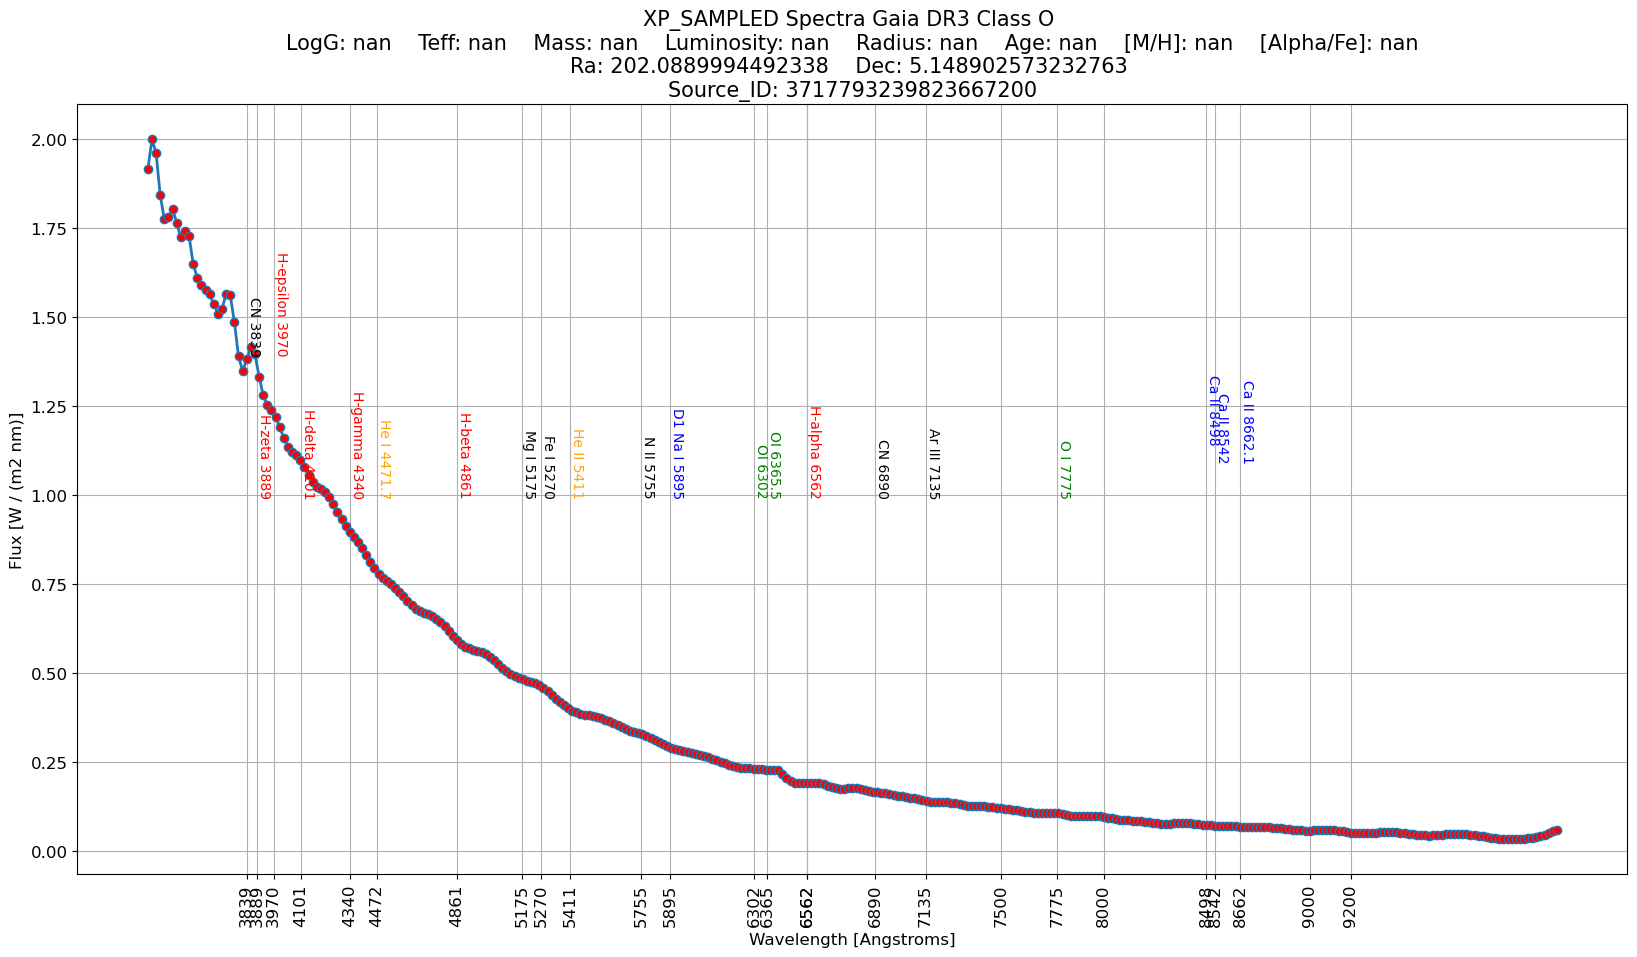


3717793239823667200 has_rvs: False


Done!


In [199]:
for idx in range(0, len(results)):
    print("\n1: " + str(results[idx]) + ' has_xp_sampled: ' + str(target['has_xp_sampled'].iloc[idx]))                        # 1st print statement
    if target['has_xp_sampled'].iloc[idx] == True:
        datalink = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_SAMPLED')
        outputs = [datalink[key][0] for key in datalink.keys()]

        #print("2: " + str(results[idx]) + " Number of stars with XP Spectra: " + str(len(outputs)))                         # 2nd print statement
        if outputs is not None:
            #print("3: " + "outputs is not None")                                                                            # 3rd print statement
            if len(outputs) > 0:
                #print("4: " + "len(outputs): " + str(len(outputs)))                                                         # 4th print statement

                # ====================================================================================
                xRa = str(target['ra'].iloc[idx])
                yDec = str(target['dec'].iloc[idx])
                source_id = str(target['source_id'].iloc[idx])

                print("\n" + "Ra: " + str(xRa))                                                                            
                print("Dec: " + str(yDec))  
                print("\n" + "Source_Id: " + str(source_id) + "\n")              

                if lamost_LRS_portal_flag == 'Y':
                    lamost_portal = 'https://dr7.lamost.org/spectrum/view?obsid=' + str(lamost_LRS_obsid)
                    webbrowser.open(lamost_portal)     

                if lamost_MRS_portal_flag == 'Y':
                    lamost_MRS_portal = 'https://dr7.lamost.org/v2.0/medspectrum/view?obsid=' + str(lamost_MRS_obsid)
                    webbrowser.open(lamost_MRS_portal)

                if cds_portal_flag == 'Y':
                    cds_portal = 'http://cdsportal.u-strasbg.fr/?target=' + str(xRa) + '%20' + str(yDec)
                    webbrowser.open(cds_portal) 

                if simbad_portal_flag == 'Y':
                    simbad_portal = 'http://simbad.cds.unistra.fr/simbad/sim-coo?Coord=' + str(xRa) + '+' + str(yDec) + \
                                '&CooFrame=FK5&CooEpoch=2000&CooEqui=2000&CooDefinedFrames=none&Radius=2&Radius.unit=arcmin&submit=submit+query'
                    webbrowser.open(simbad_portal)  

                if sdss_portal_flag == 'Y':
                    sdss_portal = 'http://skyserver.sdss.org/dr17/VisualTools/quickobj?ra=' + str(xRa) + '&dec=' + str(yDec)
                    webbrowser.open(sdss_portal)           

                if vizier_portal_flag == 'Y':
                    vizier_portal = 'http://vizier.u-strasbg.fr/viz-bin/VizieR-S?Gaia%20EDR3%20' + str(source_id) 
                    webbrowser.open(vizier_portal)                                          

                result_table = Simbad.query_region(coord.SkyCoord(str(xRa) + " " + str(yDec), 
                    unit=(u.deg, u.deg),frame='icrs'))

                #print("5: " + str(result_table))                                                                            # 5th print statement
                if result_table is not None:
                    if len(result_table) > 0:
                        #print("6: " + "Ra: " + str(xRa))                                                                     # 6th print statement
                        #print("7: " + "Dec: " + str(yDec))                                                                   # 7th print statement

                        for i in range(0, len(result_table['MAIN_ID'])):
                            if i < 5:
                                print(result_table['MAIN_ID'][i])

                        target1 = result_table['MAIN_ID'][0]

                        object = Simbad.query_object(target1)

                        tap_service = vo.dal.TAPService("http://simbad.u-strasbg.fr/simbad/sim-tap")

                        tap_sql = "SELECT main_id, sp_type, otype_txt, otype_longname \
                                        FROM basic JOIN ident ON oidref = oid \
                                            JOIN otypedef ON basic.otype = otypedef.otype \
                                        WHERE id = '" + str(target1) + "';"

                        tap_results = tap_service.search(tap_sql)
                        sptype = tap_results['sp_type']
                        txt = str(sptype).split("=")
                        txt = str(txt).replace("['", "")
                        sp_txt = str(txt).replace("']", "")
                        print("\n" + "Simbad star subclass: " + str(sp_txt))


                print("\n" + "BP_RP star subclass: " + str(target['SpT2'].iloc[idx]))
                print("BP_RP dereddened star subclass: " + str(target['SpT2_dereddened'].iloc[idx]))
                print("classlabel_espels: " + str(target['classlabel_espels'].iloc[idx]))
                print("Star Type: " + str(target['Star_Type'].iloc[idx]))
                if lamost_LRS_portal_flag == 'Y':
                    print("\nlamost_LRS_designation: "  + str(lamost_LRS_designation))
                    print("lamost_LRS_obsid: "  + str(lamost_LRS_obsid))
                    print("lamost_LRS_subclass: " + str(lamost_LRS_subclass) + '\n' )
                if lamost_MRS_portal_flag == 'Y':
                    print("lamost_MRS_designation: "  + str(lamost_MRS_designation))
                    print("lamost_MRS_obsid: "  + str(lamost_MRS_obsid))
                    print("lamost_MRS_mobsid: " + str(lamost_MRS_mobsid) + '\n' )
                #print("SpTypeSim: " +  str(SpTypeSim))
                #print("SpTypeSD: " +  str(SpTypeSD))
                #print("SpName: " +  str(SpName))
                #print('\nasassn_name: ' + str(df_variable[['asassn_name']].values))
                #print('other_names: ' + str(df_variable[['other_names']].values))
                #print("ASAS_SN Variable Type: " + str(df_variable[['variable_type']].values))
                #print("\nlamost_designation: "  + str(lamost_designation))
                #print("lamost_obsid: "  + str(lamost_obsid))
                #print("lamost_subclass: " + str(lamost_subclass))
                #print("Star Distance [pc]: " + str(int(target['distance_gspphot'].iloc[idx])))
                #print("Star Distance [light years]: " + str(int(target['distance_gspphot'].iloc[idx] * 3.26156)) + "\n")

                # ====================================================================================


                xp      = outputs[0].to_table()                       

                # Add flux-density columns ============================
                xp['flux_jy']         = xp['flux'].to(u.Jansky, equivalencies = u.spectral_density(xp['wavelength'].value * xp['wavelength'].unit))
                xp['flux_mjy']        = xp['flux_jy'].to(u.millijansky)
                xp['flux_mjy'].format = '7.4f'
                
                # =========
                
                #display(xp)

                # =========

                fig       = plt.figure(figsize=[20,10])

                yRangeMax = float(xp['flux'].max())

                plt.plot(xp['wavelength']*10, xp['flux']/yRangeMax * 2, linewidth = 2, marker='o', markerfacecolor='red') 
                plt.title('XP_SAMPLED Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                ' \nLogG: ' + str(round(target['logg_gspphot'].iloc[idx], 2)) + 
                '    Teff: ' + str(round(target['teff_gspphot'].iloc[idx],0)) +
                '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                '    [M/H]: ' + str(round(target['mh_gspphot'].iloc[idx],2)) +
                '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                if make_canvas_flag == "Y":
                    make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                fontsize = 12)
                #else:
                    #make_labels()

                if hydrogen_lines_flag == "Y":
                    Hydrogen_lines(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                   fontsize = 12)

                plt.show()


                
                    
        print("\n" + str(results[idx]) + ' has_rvs: ' + str(target['has_rvs'].iloc[idx]) + "\n")
        if target['has_rvs'].iloc[idx] == True:
            datalinkRVS = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'RVS')
            outputsRVS = [datalinkRVS[key][0] for key in datalinkRVS.keys()]
            #print("datalinkRVS: " + str(datalinkRVS))

            if outputsRVS is not None:
                if len(outputsRVS) >0:
                    xpRVS      = outputsRVS[0].to_table()

                    # =========
                
                    #display(xpRVS)

                    # =========

                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8460, 8580)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas1()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8580, 8700)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas2()
                        
                    plt.show()


        #print(str(results[idx]) + ' has_xp_continuous: ' + str(target['has_xp_continuouss'].iloc[idx]))
        if target['has_xp_continuous'].iloc[idx] == True:
            datalinkXPC = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_CONTINUOUS')
            outputsXPC = [datalinkXPC[key][0] for key in datalinkXPC.keys()]
            #print("datalinkXPC: " + str(datalinkXPC))

           

print("\nDone!")